In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PhucDo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PhucDo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
# Load JSON data (replace with your actual file location)
data = pd.read_json('data_20241111.json')
data['text'] = data['title'] + ' ' + data['summary']

# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define cleaning function
def clean_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [stemmer.stem(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

# Apply cleaning function
data['cleaned_text'] = data['text'].apply(clean_text)

# Step 1: Create TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['cleaned_text'])

# Step 2: Apply KMeans clustering
n_clusters = 10  # Example: you can adjust this number based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
labels = kmeans.labels_

# Step 3: Get top terms for each cluster
terms = vectorizer.get_feature_names_out()
df = pd.DataFrame(tfidf_matrix.todense(), columns=terms)
df['Cluster'] = labels

# Find top N words in each cluster
top_terms_per_cluster = {}
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster].mean().sort_values(ascending=False)
    top_terms_per_cluster[cluster] = [(term, cluster_data[term]) for term in cluster_data.index[:10] if term != 'Cluster']


In [52]:
# # TF-IDF Vectorization
# tfidf = TfidfVectorizer(max_df=0.95, min_df=0.05)
# tfidf_matrix = tfidf.fit_transform(data['cleaned_text'])

# # Dimensionality Reduction for KMeans
# svd = TruncatedSVD(n_components=100)
# reduced_matrix = svd.fit_transform(tfidf_matrix)

# # KMeans Clustering
# kmeans = KMeans(n_clusters=10, random_state=42)
# data['cluster'] = kmeans.fit_predict(reduced_matrix)

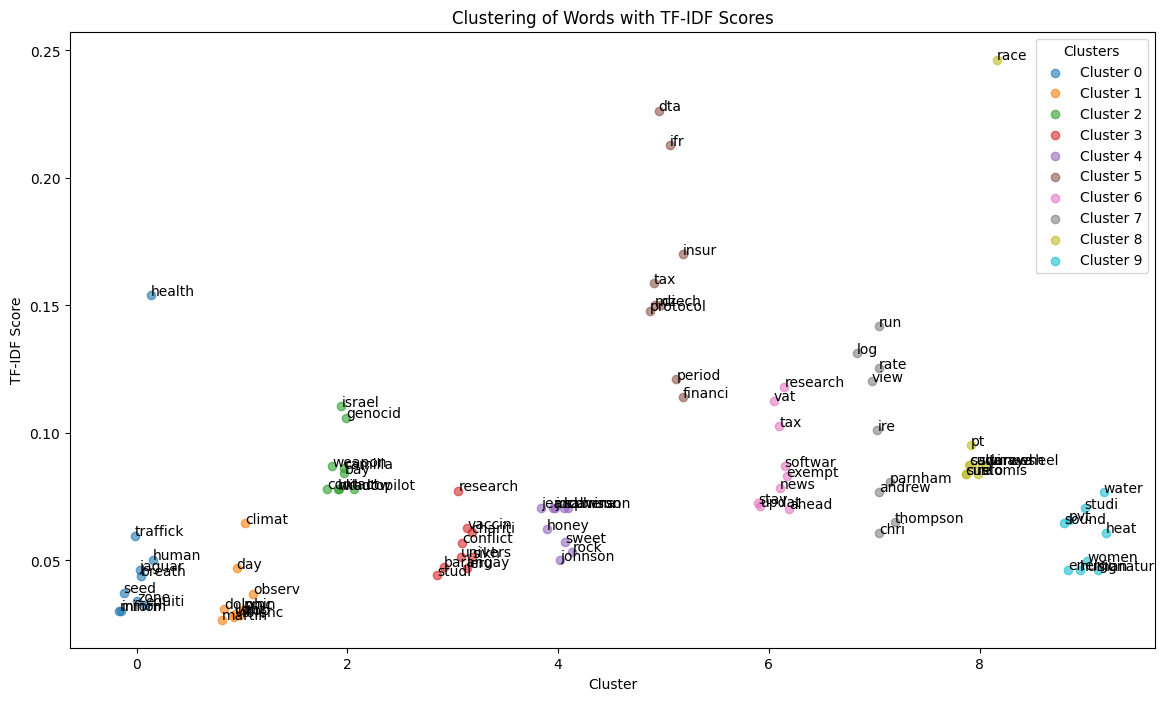

In [53]:
import matplotlib.pyplot as plt
# import pandas as pd
import numpy as np

# # Assuming `top_terms` dictionary contains top terms and their TF-IDF scores for each cluster
# # Format: {cluster_label: [(term, tfidf_value), (term, tfidf_value), ...]}

# top_terms = {}  # Example: {0: [("word1", 0.4), ("word2", 0.3)], 1: [("word3", 0.5), ...]}

# # Generate example data for plotting (replace this with actual top_terms data from your clustering)

# # Plotting
# fig, ax = plt.subplots(figsize=(12, 8))

# # Scatter plot for each cluster
# for cluster_label, terms in top_terms.items():
#     # Separate terms and their scores for plotting
#     term_labels = [term for term, _ in terms]
#     tfidf_scores = [score for _, score in terms]
    
#     # Plot terms as points in the same cluster with slightly different x positions to separate them visually
#     x_values = np.full(len(terms), cluster_label) + np.random.uniform(-0.1, 0.1, len(terms))
#     ax.scatter(x_values, tfidf_scores, label=f'Cluster {cluster_label}', alpha=0.6)
    
#     # Annotate each point with the word
#     for i, word in enumerate(term_labels):
#         ax.text(x_values[i], tfidf_scores[i], word, fontsize=12)

# # Formatting
# ax.set_xlabel('Cluster')
# ax.set_ylabel('TF-IDF Score')
# ax.legend(title='Clusters')
# plt.title('Clustered Words with TF-IDF Scores')
# plt.show()

fig, ax = plt.subplots(figsize=(14, 8))

# Scatter plot for each cluster
for cluster_label, terms_data in top_terms_per_cluster.items():
    term_labels = [term for term, score in terms_data]
    tfidf_scores = [score for term, score in terms_data]
    
    # X-axis is the cluster label, add a small random offset for visibility
    x_values = np.full(len(terms_data), cluster_label) + np.random.uniform(-0.2, 0.2, len(terms_data))
    
    # Scatter plot points
    ax.scatter(x_values, tfidf_scores, label=f'Cluster {cluster_label}', alpha=0.6)
    
    # Annotate each point with the term
    for i, term in enumerate(term_labels):
        ax.text(x_values[i], tfidf_scores[i], term, fontsize=10)

# Formatting
ax.set_xlabel('Cluster')
ax.set_ylabel('TF-IDF Score')
ax.legend(title='Clusters')
plt.title('Clustering of Words with TF-IDF Scores')
plt.show()



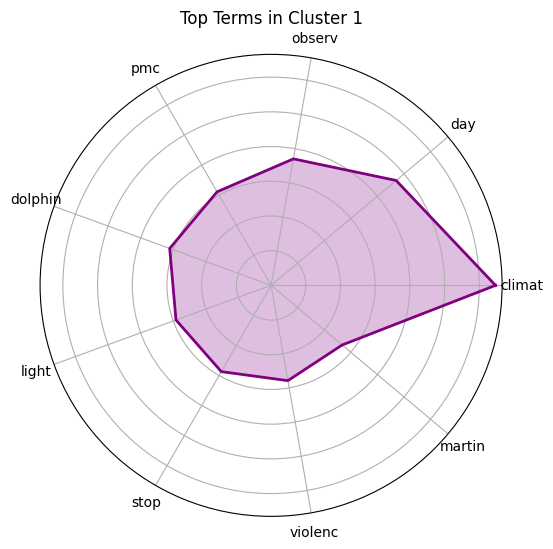

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Choose a specific cluster for the spider chart
cluster_id = 1  # Change this to visualize a different cluster
terms = [term for term, score in top_terms_per_cluster[cluster_id]]
scores = [score for term, score in top_terms_per_cluster[cluster_id]]

# Number of variables we're plotting
num_vars = len(terms)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop for the chart
scores += scores[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, scores, color='purple', alpha=0.25)
ax.plot(angles, scores, color='purple', linewidth=2)

# Label each point with term
ax.set_xticks(angles[:-1])
ax.set_xticklabels(terms)

# Remove y-axis labels for cleaner look
ax.set_yticklabels([])

plt.title(f'Top Terms in Cluster {cluster_id}')
plt.show()
